In [186]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [187]:
#Read input file and understand the data
#"default" is my dependent variable

In [188]:
germandf=pd.read_csv("german_credit.csv")

In [189]:
germandf.shape

(1000, 21)

In [190]:
germandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [191]:
x=germandf.select_dtypes(include='object')
x.columns

Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'],
      dtype='object')

In [192]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [193]:
for features in germandf.columns:
    if germandf[features].dtypes=='object':
        dummydf=pd.get_dummies(germandf[features],prefix=features)
        germandf=germandf.join(dummydf)       

In [194]:
germandf.shape

(1000, 75)

In [195]:
df=germandf.select_dtypes(include=np.object)
germandf.shape

(1000, 75)

In [196]:
for unq in df.columns:
    print(unq,df[unq].unique().shape)

account_check_status (4,)
credit_history (5,)
purpose (10,)
savings (5,)
present_emp_since (5,)
personal_status_sex (4,)
other_debtors (3,)
property (4,)
other_installment_plans (3,)
housing (3,)
job (4,)
telephone (2,)
foreign_worker (2,)


In [197]:
# Print Shape of model data

In [198]:
germandf.shape

(1000, 75)

### Check for highly correlated variables but don't required any treatment for this use case

In [199]:
import seaborn as sns
print(germandf.corr())

                                                     default  \
default                                             1.000000   
duration_in_month                                   0.214927   
credit_amount                                       0.154739   
installment_as_income_perc                          0.072404   
present_res_since                                   0.002967   
age                                                -0.091127   
credits_this_bank                                  -0.045732   
people_under_maintenance                           -0.003015   
account_check_status_0 <= ... < 200 DM              0.119581   
account_check_status_< 0 DM                         0.258333   
account_check_status_>= 200 DM / salary assignm... -0.044009   
account_check_status_no checking account           -0.322436   
credit_history_all credits at this bank paid ba...  0.134448   
credit_history_critical account/ other credits ... -0.181713   
credit_history_delay in paying off in th

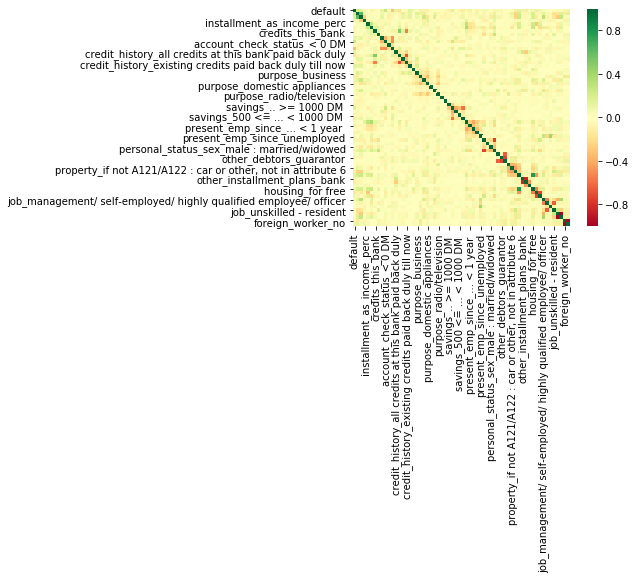

In [200]:
sns.heatmap(germandf.corr(), square=True, cmap='RdYlGn')

### Drop the original variables which are converted to dummy

In [201]:
x=['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker']

In [202]:
germandf.drop(x,axis=1,inplace=True)

In [203]:
germandf.shape
germandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [204]:
from sklearn.model_selection import train_test_split
X=germandf.drop("default",axis=1)
y=germandf['default']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [205]:
from sklearn.ensemble import RandomForestClassifier

randomfc=RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
randomfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [206]:
y_pred=randomfc.predict(X_test)
print('Train Score',randomfc.score(X_train,y_train))

print('Test Score',randomfc.score(X_test,y_test))

Train Score 1.0
Test Score 0.7433333333333333


In [207]:
from sklearn import metrics
expected=y_test
predicted=y_pred
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       214
           1       0.60      0.30      0.40        86

    accuracy                           0.74       300
   macro avg       0.69      0.61      0.62       300
weighted avg       0.72      0.74      0.71       300

[[197  17]
 [ 60  26]]


### Q6 Show the list of the features importance( 1 Marks)

In [208]:
feature_importances = pd.DataFrame(randomfc.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
credit_amount,0.100113
age,0.078122
duration_in_month,0.072037
account_check_status_no checking account,0.044759
installment_as_income_perc,0.036985
present_res_since,0.033360
account_check_status_< 0 DM,0.030929
credit_history_critical account/ other credits existing (not at this bank),0.029383
savings_... < 100 DM,0.020143
credits_this_bank,0.018879


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [209]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [210]:
# Use below values
num_folds = 10
seed = 77

In [211]:
#Validate the Random Forest model build above using k fold

In [212]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [213]:
rfc_cv_score = cross_val_score(randomfc, X_train, y_train, cv=10)

In [214]:
rfc_cv_score

array([0.76056338, 0.76056338, 0.8028169 , 0.78873239, 0.71428571,
       0.71428571, 0.79710145, 0.75362319, 0.76811594, 0.75362319])

In [215]:
#Calculate Mean score

In [216]:
rfc_cv_score.mean()

0.7613711253025398

In [217]:
# Calculate score standard deviation using std()

In [218]:
rfc_cv_score.std()

0.028885944373115723

# Q8 Print the confusion matrix( 1 Marks)

In [219]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
#randomfc1 = RandomForestClassifier()
grid = {'n_estimators': [100]}
cv = KFold(n_splits = 10, shuffle=True, random_state =77)
clf = GridSearchCV(randomfc, grid, n_jobs=2, cv=cv,scoring='accuracy')
clf.fit(X_train, y_train)

prediction = clf.predict(X_test) # predicting on the validation set
confusion_matrix(y_test, prediction)

array([[197,  17],
       [ 62,  24]])

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [220]:
from sklearn.metrics import classification_report

from sklearn import metrics
expected=y_test
predicted=y_pred
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       214
           1       0.60      0.30      0.40        86

    accuracy                           0.74       300
   macro avg       0.69      0.61      0.62       300
weighted avg       0.72      0.74      0.71       300



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [221]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [222]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    randomfc.fit(X_, y_)
    y_pred = randomfc.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [223]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7393333333333334
Standard deviation:  0.011718930554164633
